TWITTER SENTIMENT ANALYSIS


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re         #regular expression is used to find particular phrases or to replace particular phrases or words
import string     #for pre-processing
import nltk       #natural language processing toolkit
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [9]:
!pip install kaggle

In [10]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download dv1453/twitter-sentiment-analysis-analytics-vidya/train_E6oV3lV.csv

twitter-sentiment-analysis-analytics-vidya.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip twitter-sentiment-analysis-analytics-vidya.zip

Archive:  twitter-sentiment-analysis-analytics-vidya.zip
  inflating: sample_submission_gfvA5FD.csv  
  inflating: test_tweets_anuFYb8.csv  
  inflating: train_E6oV3lV.csv       


In [14]:
df=pd.read_csv('/content/train_E6oV3lV.csv')

In [15]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [16]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


PRE-PROCESSSING DATA

In [17]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [18]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [19]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [20]:
# remove short words(a,is)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [21]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [22]:
# stem the words(eg.: fighting,fighter,fight are all stemmed to fight)
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [23]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


EXPLORATORY DATA ANALYSIS

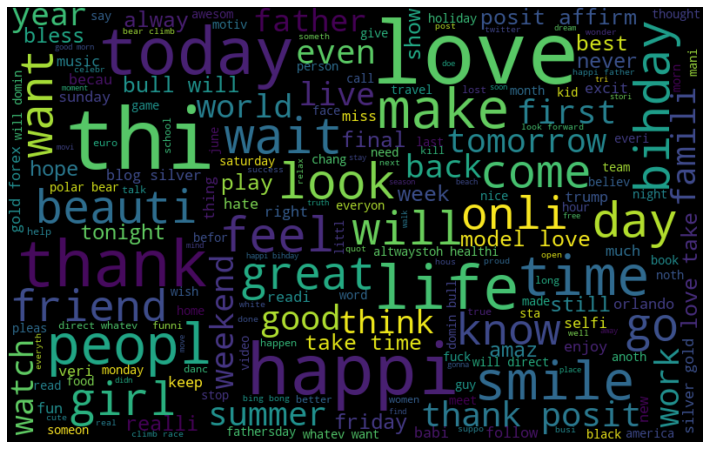

In [24]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

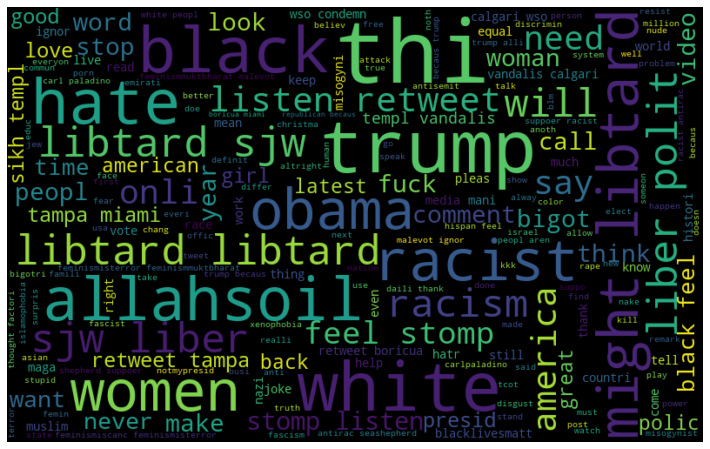

In [25]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [27]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [28]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [29]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [30]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [31]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


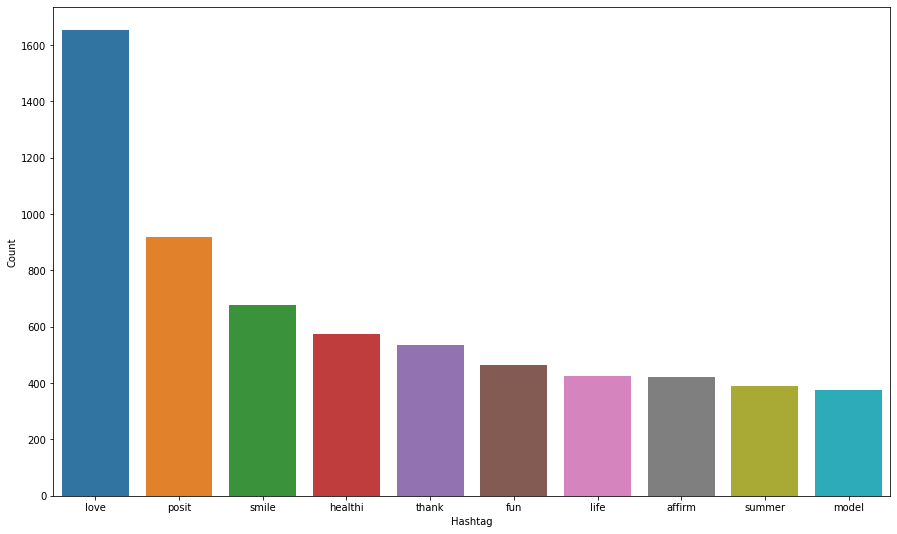

In [32]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [33]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


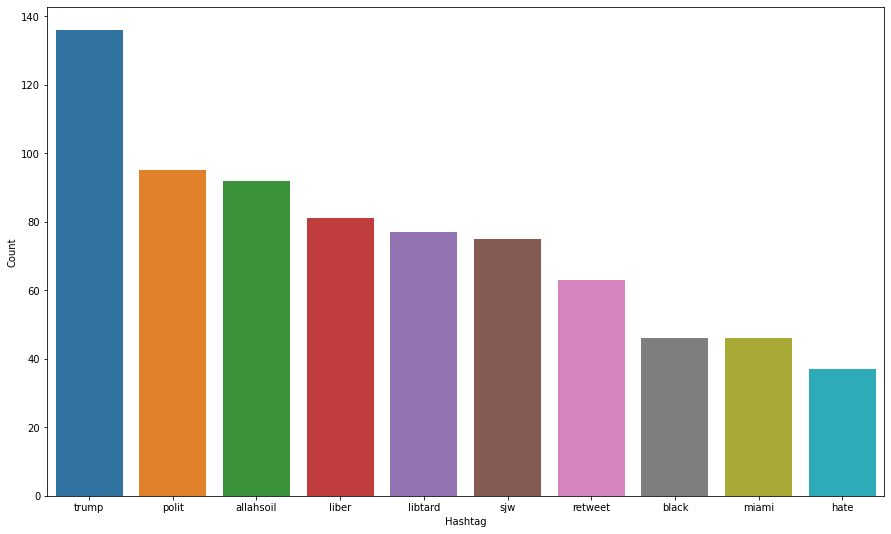

In [34]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

INPUT SPLIT

In [35]:
# feature extraction(we need to convert words into vectors or bag of words , here we use bag of words)
from sklearn.feature_extraction.text import CountVectorizer # generate bag of words
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [36]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Splitting data for training and testing.

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

MODEL TRAINING- Logistic Regression

A logistic regression for a classification problem.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [39]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [41]:
accuracy_score(y_test,pred)

0.9469403078463271

In [42]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [43]:
accuracy_score(y_test,pred)

0.9433112251282693

___________________________________________________________________________________

NAIVE BAYES

Test and Train Datasets

df is actually train dataset. Now, import test dataset.

In [44]:
test=pd.read_csv('/content/test_tweets_anuFYb8.csv')


In [45]:
train=pd.read_csv('/content/train_E6oV3lV.csv')

In [46]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [47]:
train.shape

(31962, 3)

In [48]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [49]:
test.shape

(17197, 2)

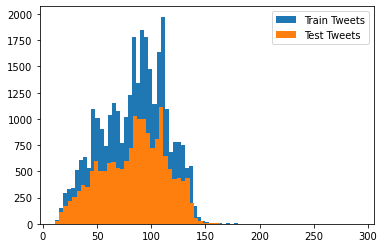

In [50]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=70,label="Train Tweets")
plt.hist(length_test,bins=70,label="Test Tweets")
plt.legend()
plt.show()

In [51]:
combine=train.append(test,ignore_index=True) #combining train and test dataset
combine.shape

(49159, 3)

In [52]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text = re.sub(i,'',input_text)
  return input_text

Removing twitter handles:

In [53]:
combine

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [54]:
combine['tidy_tweet']=np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*")
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [55]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [56]:
#remove short words like a,an,i,etc.
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [57]:
tokenized_tweet=combine['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [58]:
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

Stemmimg reduces all words to their root forms.

Separate clouds for racist and no-racist tweets created for new dataset.

Non-racist Tweets:

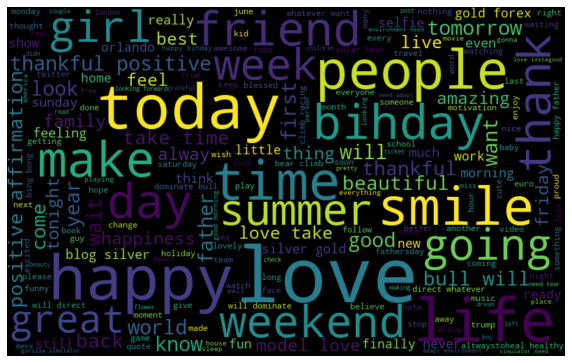

In [59]:
normal_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Racist tweets:

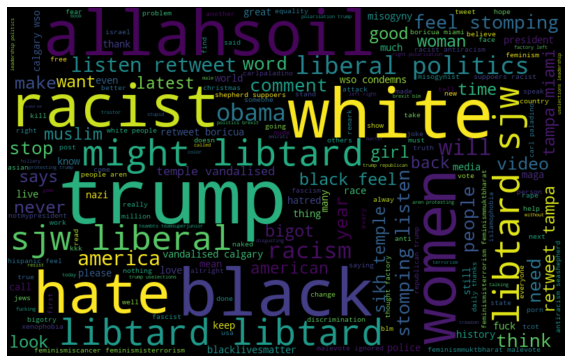

In [60]:
negative_words=' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Understanding the impact of hashtags on tweet sentiment


In [61]:

# extract the hashtag
def hashtag_extract(x):
    hashtags = []
    # loop words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags 

In [62]:
# extract hashtags from non-racist/sexist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular=sum(ht_regular,[])
ht_negative=sum(ht_negative,[])

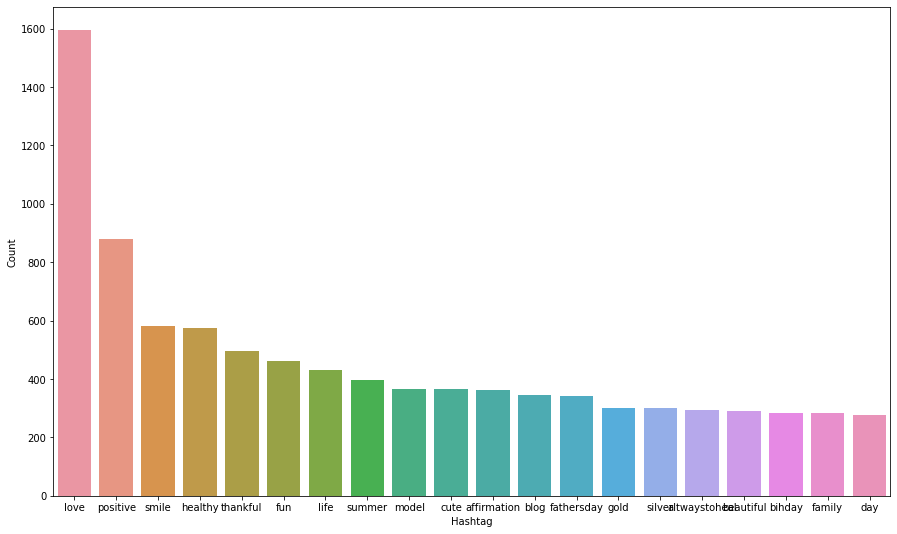

In [63]:
# select top 20 most frequent hashtags under non-racist tweets

nonracist_tweets=nltk.FreqDist(ht_regular)
df_1=pd.DataFrame({'Hashtag' : list(nonracist_tweets.keys()),'Count' : list(nonracist_tweets.values())})

df_1 = df_1.nlargest(columns='Count', n=20)
plt.figure(figsize=(15,9))
ax=sns.barplot(data=df_1, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

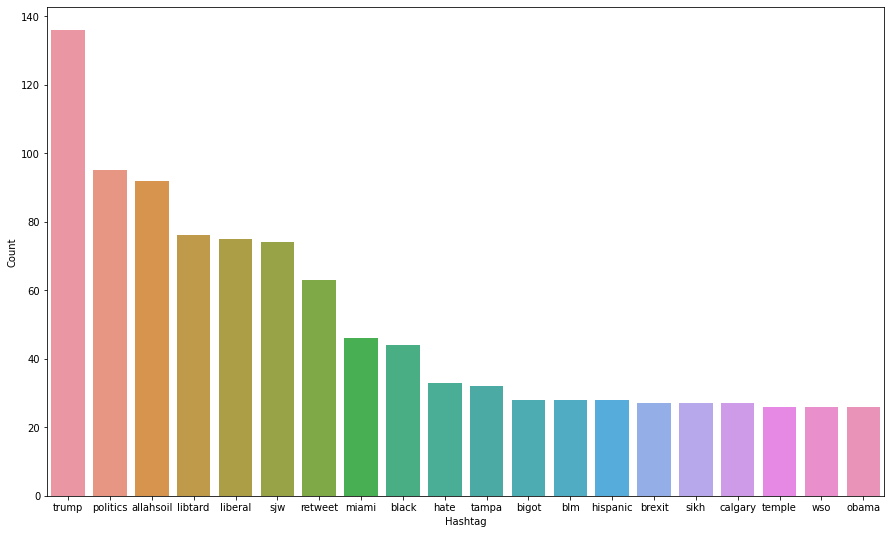

In [64]:
# select top 20 most frequent hashtags under racist tweets

racist_tweets=nltk.FreqDist(ht_negative)
df_2=pd.DataFrame({'Hashtag' : list(racist_tweets.keys()),'Count' : list(racist_tweets.values())})

df_2 = df_2.nlargest(columns='Count', n=20)
plt.figure(figsize=(15,9))
ax=sns.barplot(data=df_2, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [66]:
#bag-of-words

bow_vectorizer= CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(combine['tidy_tweet'] )#tokenize and build vocabulary
bow.shape      

(49159, 1000)

In [67]:
#TF-IDF
combine=combine.fillna(0)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(bow,combine['label'],test_size=0.2,random_state=69)

In [68]:
print("X_train_shape :",X_train.shape)
print("X_test_shape :",X_test.shape)
print("Y_train_shape :",Y_train.shape)
print("Y_test_shape :",Y_test.shape)

X_train_shape : (39327, 1000)
X_test_shape : (9832, 1000)
Y_train_shape : (39327,)
Y_test_shape : (9832,)


Using Multinomial Naive Bayes Classifier:

In [69]:
from sklearn.naive_bayes import MultinomialNB

model_naive=MultinomialNB().fit(X_train,Y_train)
predicted_naive = model.predict(X_test)


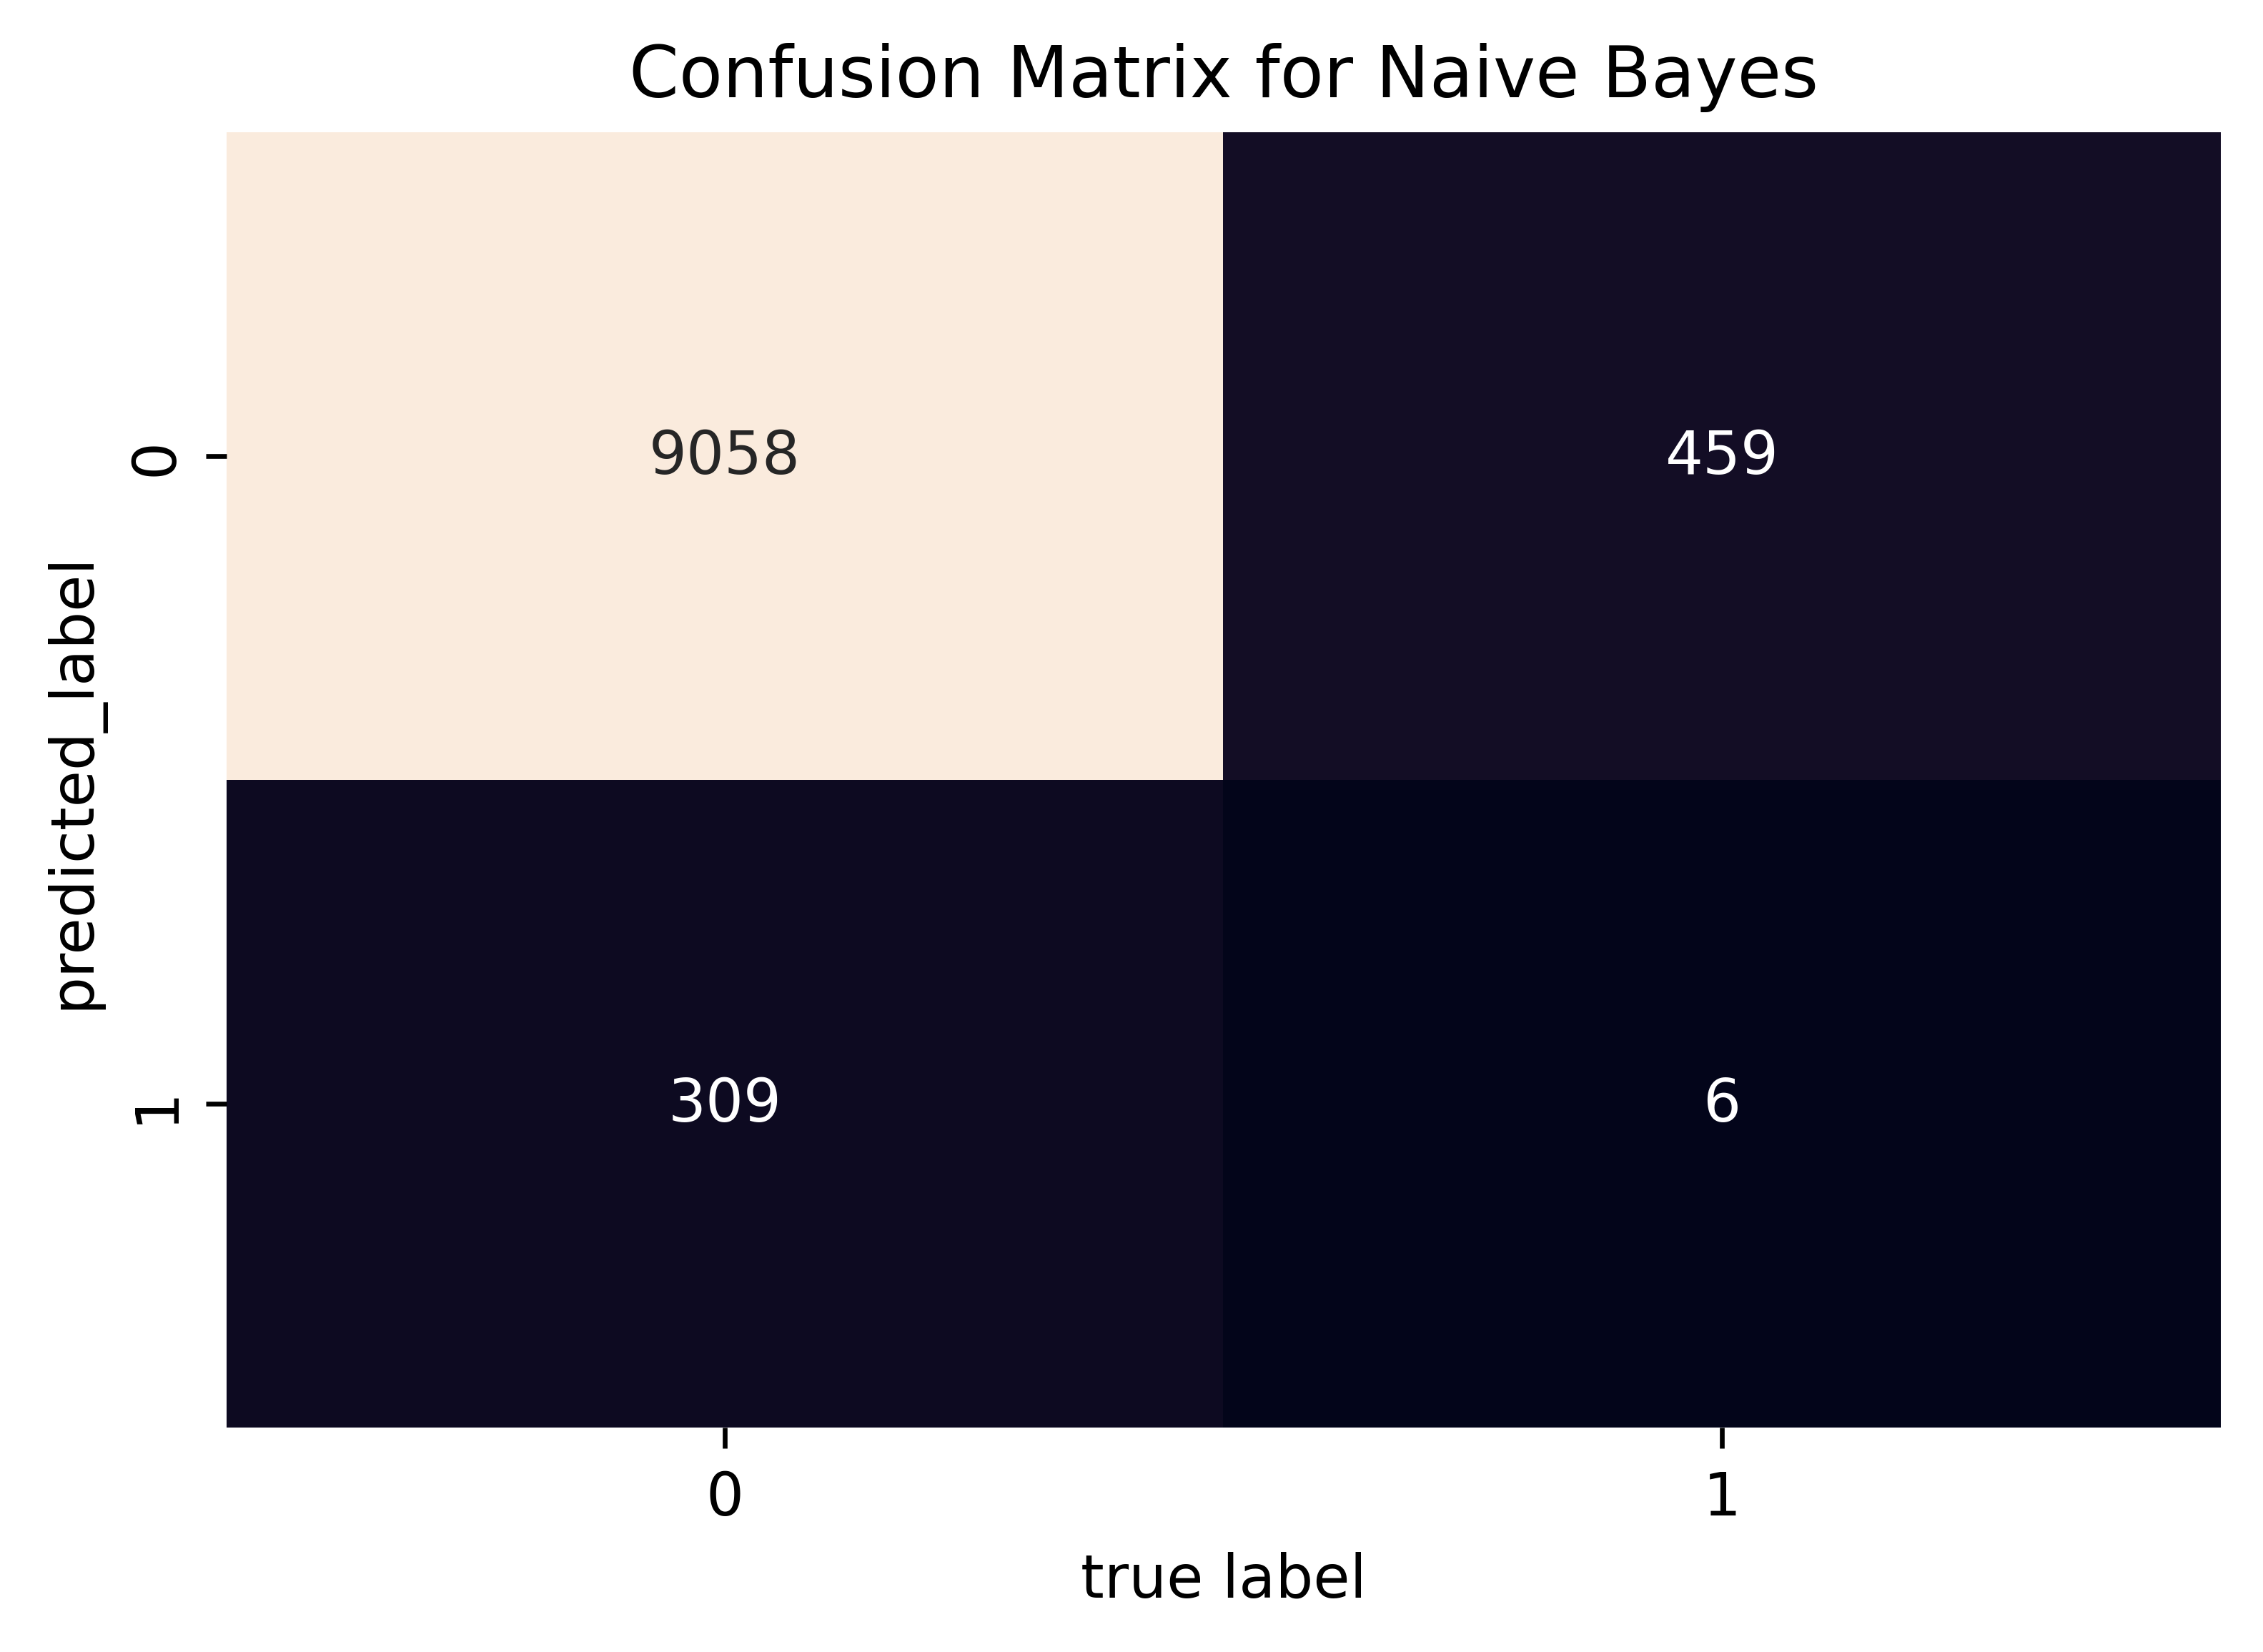

In [70]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(Y_test, predicted_naive)
sns.heatmap(mat.T,annot=True,fmt='d',cbar=False)

plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("true label")
plt.ylabel("predicted_label")
plt.savefig("confusion_matrix.png")
plt.show()

In [71]:
from sklearn.metrics import accuracy_score

score_naive =  accuracy_score(predicted_naive,Y_test)
print("Accuracy with Naive-Bayes",score_naive)

Accuracy with Naive-Bayes 0.9218877135882831


________________________________________________________________________________

CLASSIFYING TWEETS INTO POSITIVE AND NEGATIVE TWEETS:

In [72]:
df1=pd.read_csv('/content/train_E6oV3lV.csv')

In [73]:
df1

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [74]:
df1['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

Cleaning the text:

In [75]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)

  return text


df1['tweet']=df1['tweet'].apply(cleanText)

df1

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can't use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide: society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"sikh temple vandalised in in calgary, wso con..."


In [76]:
#pip install TextBlob

In [77]:
from textblob import TextBlob

Creating function to get the subjectivity(how opinionated the text is) and Polarity(how positive or negative the tweet is)

In [78]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


Creating new columns for subjectivity and polarity:

In [79]:
df1['Subjectivity']=df1['tweet'].apply(getSubjectivity)
df1['Polarity']=df1['tweet'].apply(getPolarity)

df1

,id,label,tweet,Subjectivity,Polarity
0,1,0,when a father is dysfunctional and is so sel...,1.0,-0.500000
1,2,0,thanks for lyft credit i can't use cause the...,0.2,0.200000
2,3,0,bihday your majesty,0.0,0.000000
3,4,0,model i love u take with u all the time in u...,0.6,0.976562
4,5,0,factsguide: society now motivation,0.0,0.000000
...,...,...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...,0.0,0.000000
31958,31959,0,to see nina turner on the airwaves trying to...,0.5,0.400000
31959,31960,0,listening to sad songs on a monday morning otw...,1.0,-0.500000
31960,31961,1,"sikh temple vandalised in in calgary, wso con...",0.0,0.000000


WordCloud

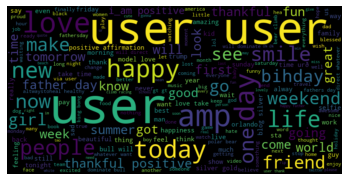

In [80]:
allWords=''.join(twt for twt in df['tweet'])
wordCloud = WordCloud(width = 800, height = 400, random_state= 21, max_font_size=119).generate(allWords)


plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Creating a function to compute the negative,neutral and positive analysis.

In [81]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score ==0 :
    return 'Neutral'
  else:
    return 'Positive'

In [82]:
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)

df1

,id,label,tweet,Subjectivity,Polarity,Analysis
0,1,0,when a father is dysfunctional and is so sel...,1.0,-0.500000,Negative
1,2,0,thanks for lyft credit i can't use cause the...,0.2,0.200000,Positive
2,3,0,bihday your majesty,0.0,0.000000,Neutral
3,4,0,model i love u take with u all the time in u...,0.6,0.976562,Positive
4,5,0,factsguide: society now motivation,0.0,0.000000,Neutral
...,...,...,...,...,...,...
31957,31958,0,ate isz that youuu?ððððððð...,0.0,0.000000,Neutral
31958,31959,0,to see nina turner on the airwaves trying to...,0.5,0.400000,Positive
31959,31960,0,listening to sad songs on a monday morning otw...,1.0,-0.500000,Negative
31960,31961,1,"sikh temple vandalised in in calgary, wso con...",0.0,0.000000,Neutral


Printing all positive tweets:

In [83]:
sortedDF1= df1.sort_values(by=['Polarity'])
j=1
for i in range(0, sortedDF1.shape[0]):
  if(sortedDF1['Analysis'][i] == 'Positive'):
    print(str(j)+')'+sortedDF1['tweet'][i])
    print() #printing new line
    j=j+1

Streaming output truncated to the last 5000 lines.
13382)sydney vividsydney  blessed beauty beautiful happiness   lights love fitfam gym run lift 

13383) i just won a giveaway from you guys on instagram so excited  this awesome   

13384)happy easter everyone!  

13385)hard to think how  is still very much prevalent in so many societies. if you're not white, rest assured discâ¦ 

13386)be   n healthy you donât get in life what you want. you get what you are. â jackie lapin 

13387)happy aldub47thweeksary  &amp;  ó¾µ 5 weeks more to go!   imagineyouandi

13388)  a reminder for shopaholics :)   lessismore via  

13389)get up get   get  enjoy music today free apps free music 

13390) anmolshare: "ff : reutersbiz save-insure-invest for a   future :) follow us for  times :)"

13391)  alcohol might have been a factor here country rock funny beatles pop   romance  

13392)ku zouma âvery happyâ at chelsea  spos chelsea   ku very 

13393)  be h a p p y! qotd quote   inspirational 

1

Printing all negative tweets:

In [84]:
j=1
sortedDF2=df1.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF2.shape[0]):
  if(sortedDF2['Analysis'][i] == 'Negative'):
    print(str(j)+')'+sortedDF2['tweet'][i])
    print() #printing new line
    j=j+1


Streaming output truncated to the last 5000 lines.
2224) mediamisogyny, russian interference,  crosschecking/voter suppression &amp; outdated system doesn't reflect usâ¦ 

2225) ordered salad with olives as displayed on the website and got green peas instead. cheating   

2226)a few changes to chapter 4 from the beta-reader &amp; we totally nailed the outline of book 2.   now. amwriting amediting firstnovel

2227)  birds &amp; bad piggies finger family \ nursery rhymes lyrics and ...  via 

2228)a friend just told me she's afraid to go to dc rally &amp; be attacked by berniebros or the  racists cuz she's not white.  

2229)tyruswong bambi aist thwaed by   didnt want his children 'constrained by lines laid down by others'

2230)because they r little babies running home to mommy. fascist little babies.   

2231)gutted that i wont b seeing my beauties  &amp;   2night due to being called into work ðª  

2232)  there are a lot of people that think i am a complete idiot, which may be true